**Import Libiraries**

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')


/kaggle/input/titanic-dataset/Titanic-Dataset.csv


**Load the Data**

In [4]:
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Exploratory Data Analysis**

In [6]:
df.shape

(891, 12)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [11]:
df['Survived'].value_counts().T

Survived
0    549
1    342
Name: count, dtype: int64

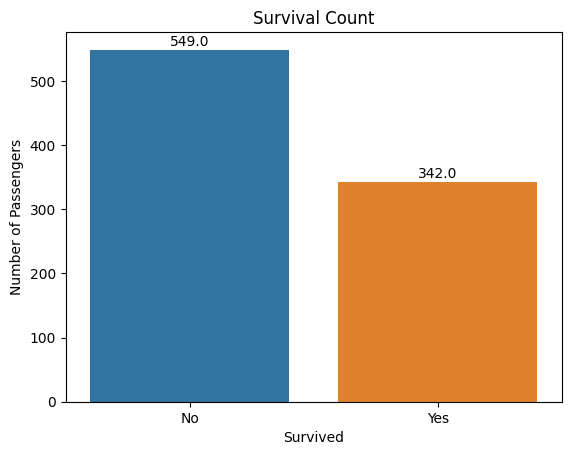

In [12]:
ax = sns.countplot(x = 'Survived', data = df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 6),  # 10 points vertical offset
                textcoords = 'offset points')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

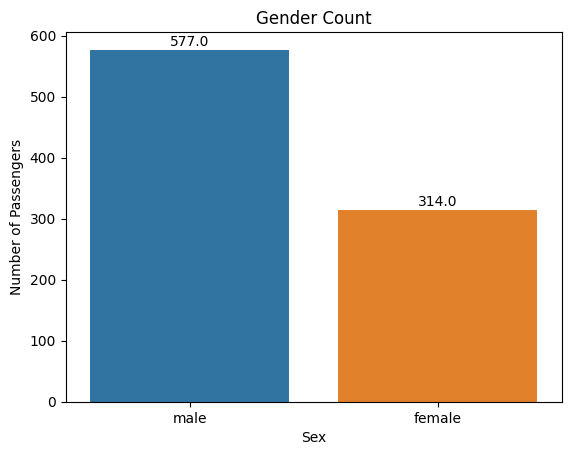

In [13]:
ax = sns.countplot(x = 'Sex', data = df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 6),  # 10 points vertical offset
                textcoords = 'offset points')
plt.title('Gender Count')
plt.ylabel('Number of Passengers')
plt.show()

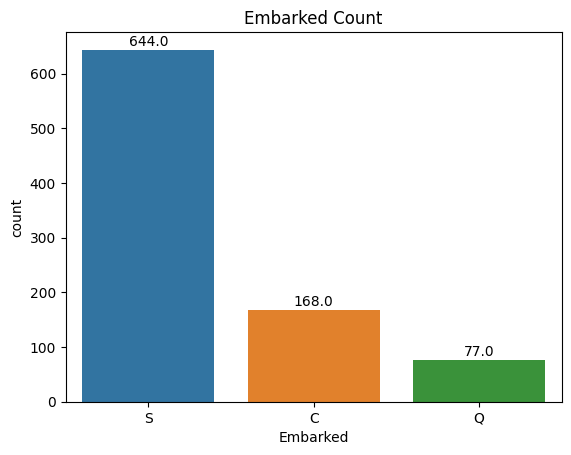

In [14]:
ax = sns.countplot(x = 'Embarked', data = df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 6),  # 10 points vertical offset
                textcoords = 'offset points')

plt.title("Embarked Count")
plt.show()

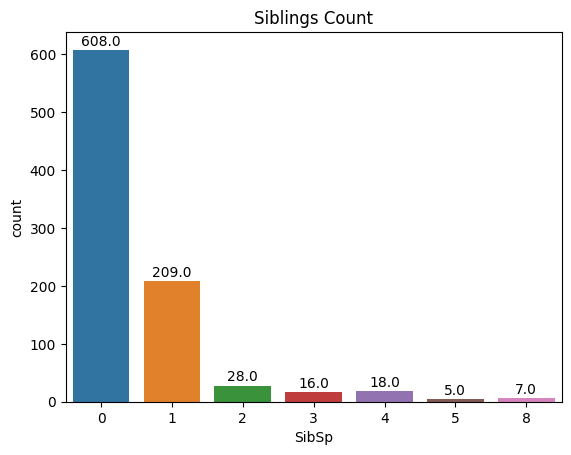

In [15]:
ax = sns.countplot(x = 'SibSp', data = df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 6),  # 10 points vertical offset
                textcoords = 'offset points')

plt.title("Siblings Count")
plt.show()

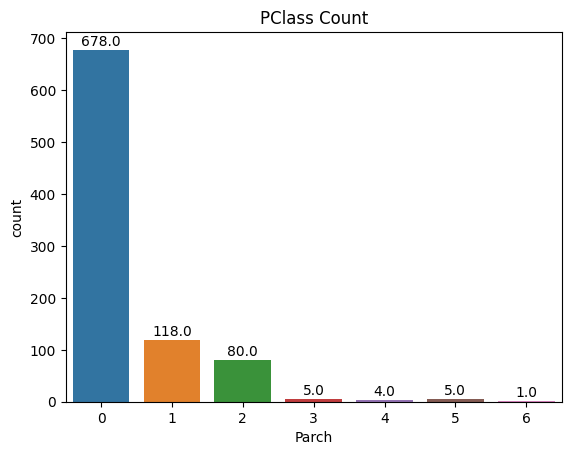

In [16]:
ax = sns.countplot(x = 'Parch', data = df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 6), 
                textcoords = 'offset points')
plt.title("PClass Count")
plt.show()

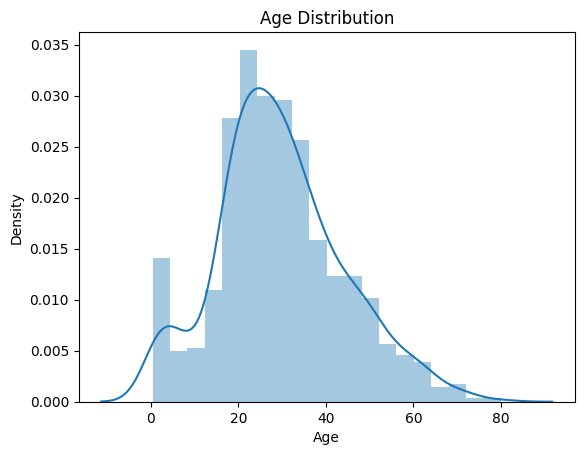

In [17]:
sns.distplot(df["Age"])
plt.title("Age Distribution")
plt.show()

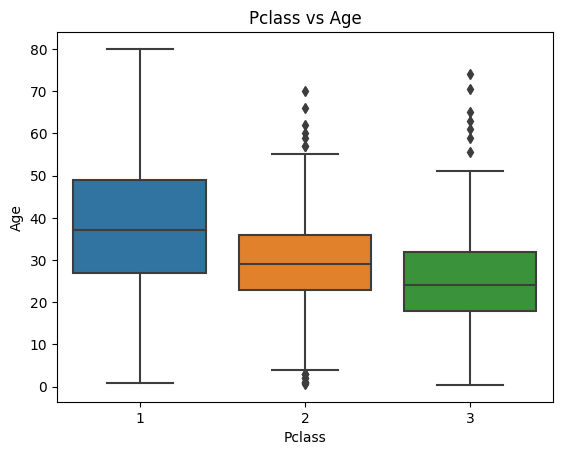

In [18]:
sns.boxplot( x = "Pclass" , y = "Age", data = df)
plt.title("Pclass vs Age")
plt.show()

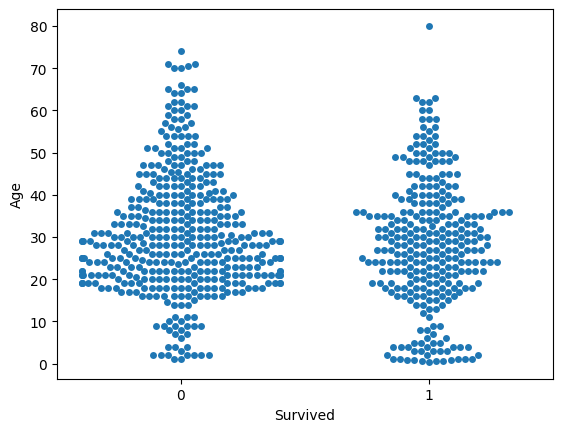

In [19]:
sns.swarmplot(x = "Survived" , y = "Age", data = df)
plt.show()

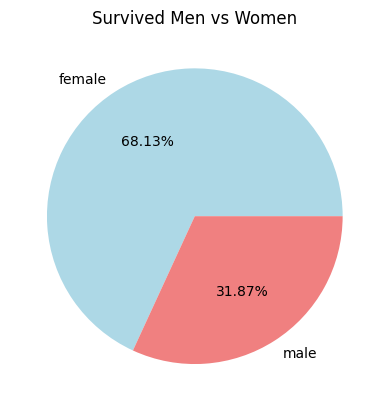

In [20]:
survived_data = df[df['Survived'] == 1]
survived_counts = survived_data['Sex'].value_counts()
plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.2f%%', colors=['lightblue', 'lightcoral'])
plt.title("Survived Men vs Women")
plt.show()

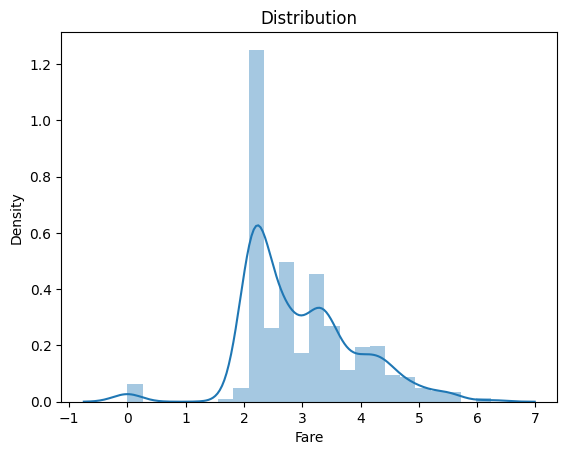

In [21]:
df['Fare'] = np.log(df['Fare']+1)

sns.distplot(df['Fare'])
plt.title("Distribution")
plt.show()

**Pre-Process**

In [22]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [24]:
df.drop(columns = ['Cabin'], inplace = True)

In [25]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [26]:
df.drop(columns = ['Name'], inplace = True)
df.drop(columns = ['Ticket'], inplace = True)

In [27]:
df.drop(columns = ['PassengerId'], inplace = True)


In [28]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1,'Q' : 2})

In [29]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,2.110213,0
1,1,1,0,38.0,1,0,4.280593,1
2,1,3,0,26.0,0,0,2.188856,0
3,1,1,0,35.0,1,0,3.990834,0
4,0,3,1,35.0,0,0,2.202765,0


**Modelling**

In [30]:
x = df.drop(columns=['Survived'])
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=16)

In [31]:
undersampler = RandomUnderSampler(random_state=16)
x_train, y_train = undersampler.fit_resample(x_train, y_train)

In [32]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "XGBoost": xgb.XGBClassifier(),
}

for modelName, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model) 
    
    pipeline.fit(x_train, y_train)
    
    y_pred = pipeline.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{modelName}: Accuracy = {accuracy:.2f}\n")
    
    print(classification_report(y_test, y_pred))
    
    print("-------------------------------------------")

Logistic Regression: Accuracy = 0.79

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       164
           1       0.71      0.77      0.74       104

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

-------------------------------------------
Decision Tree: Accuracy = 0.72

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       164
           1       0.63      0.70      0.66       104

    accuracy                           0.72       268
   macro avg       0.71      0.72      0.71       268
weighted avg       0.73      0.72      0.73       268

-------------------------------------------
Random Forest: Accuracy = 0.75

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       164
           1       0.66      0.74      0.70    